Data Analysis is all about finding some intersting insights in the data and we can find more insight by asking more questions and here I'm going to find some interesting insights in the data by asking the following questions:
* How total(price of house) is distributed?
* How rent amount is distributed?
* Significance of No of Rooms with the Rent
* What about pets?
* City and the rooms
* Does the city has to do any thing with rent?
* Does the people are looking for more bathrooms? (Silly Right)
* Does furnishing impact in the rent?
* Whats the relationship between parking spaces and the total rent?
* What about Fire Insurance?
* What about the impact of property tax in the rent?
Finally we will create a machine learning model to perform predictive analysis. I can assure that this is gonna be very interesting stuff...
Let's Start----->

Importando as bibliotecas necessárias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [ ]:
data = pd.read_csv('sample_data/houses_to_rent_v2.csv')

In [114]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [115]:
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [116]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

Exibindo as informações da base de dados

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


Separando os atributos por tipo de dados

In [118]:
numerical,category=[],[]
col = data.columns
for i in col:
    if data[i].dtype ==object:
        category.append(i)
    else:
        numerical.append(i)

In [119]:
print("Os atributos numéricos {}".format(numerical))
print("Os atributos categóricos {}".format(category))

Os atributos numéricos ['area', 'num_quartos', 'num_banheiros', 'garagem', 'num_andares', 'aceita_animais', 'mobilia', 'valor_aluguel', 'valor_condominio', 'valor_iptu', 'valor_seguro_incendio']
Os atributos categóricos ['cidade', 'estado']


In [120]:
def handle_missing_values(col):
    print('Enter your choice\n1.Mean\t2.Median\t3.Mode')
    i=int(input())
    if i ==1:
        val =data[col].mean()
    elif i ==2:
        val = data[col].median()
    else:
        val = data[col].mode()[0]
    data[col] = data[col].fillna(val)

In [121]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

In [122]:
def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.7 or cor[i][j]>-0.7 and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

In [123]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

Limpeza de dados

In [124]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

Verificando a correlação dos atributos

<AxesSubplot:>

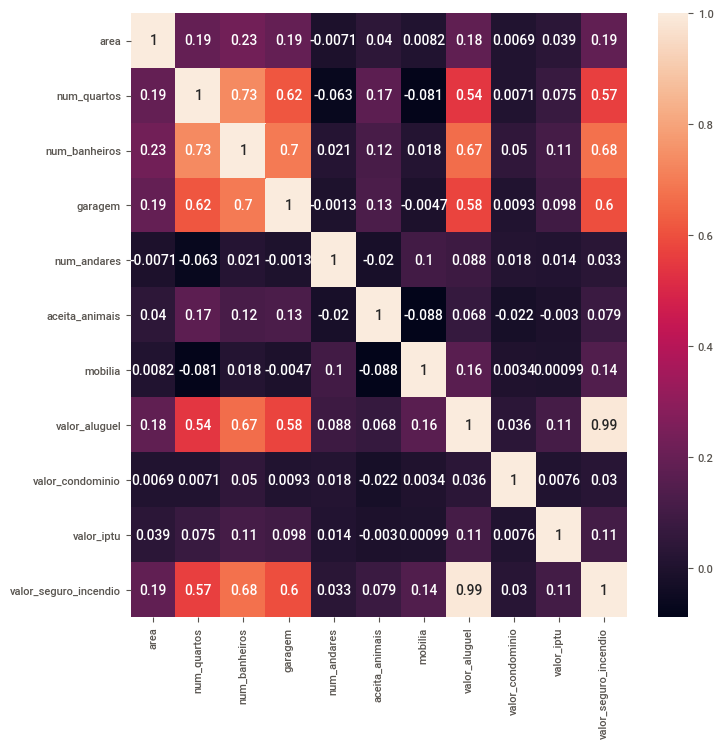

In [126]:
plt.figure(figsize =(8,8))
cor = data[numerical].corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

In [ ]:
sns.pairplot(data[numerical])

In [ ]:
!pip install sweetviz

In [25]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


6# How total is distributed?

1.   List item
2.   List item



In [34]:
aluguel = data['valor_aluguel'].astype(float)

pandas.core.series.Series

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   num_andares            10692 non-null  int64 
 6   aceita_animais         10692 non-null  int64 
 7   mobilia                10692 non-null  int64 
 8   valor_aluguel          10692 non-null  int64 
 9   valor_condominio       10692 non-null  int64 
 10  valor_iptu             10692 non-null  int64 
 11  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1002.5+ KB


In [39]:
int(aluguel.min())

450

# Como os valores de aluguel estão distribuidos?

<Figure size 800x500 with 0 Axes>

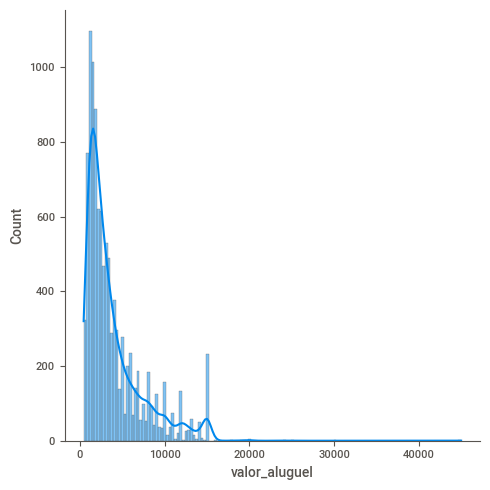

In [67]:
plt.figure(figsize =(8,5))
ax = sns.displot(
                 aluguel,
                 kde= True,
                )

<AxesSubplot:xlabel='valor_aluguel'>

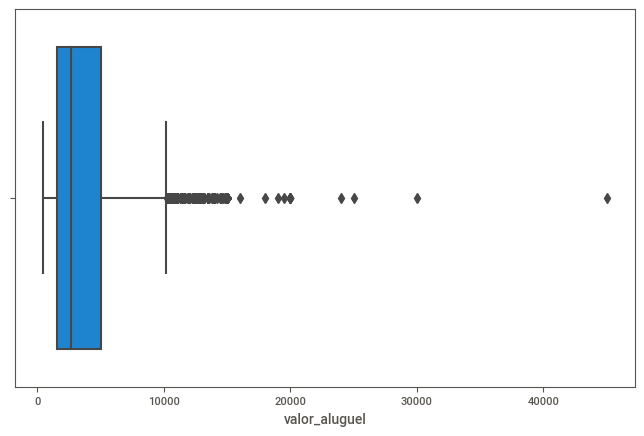

In [68]:
plt.figure(figsize =(8,5))
sns.boxplot(x=data['valor_aluguel'])

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 10.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

To see the total column more clearly see the plot given below this confirms our inference about the data

<AxesSubplot:xlabel='valor_aluguel'>

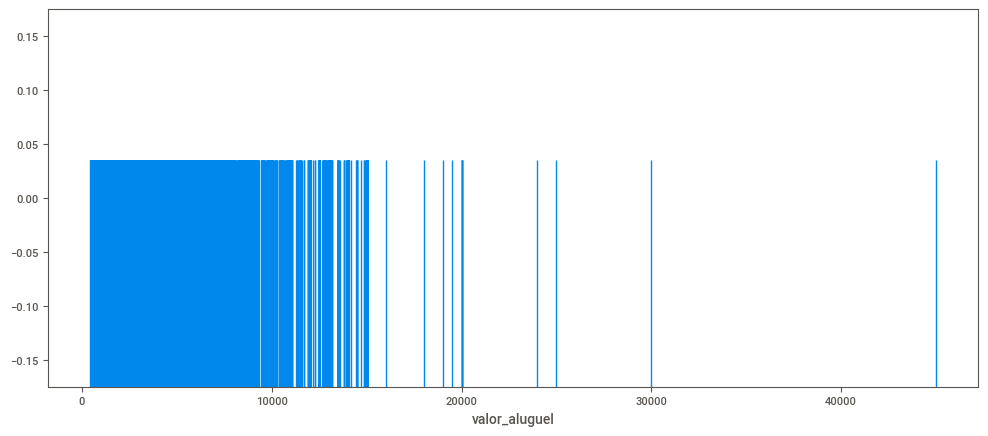

In [85]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

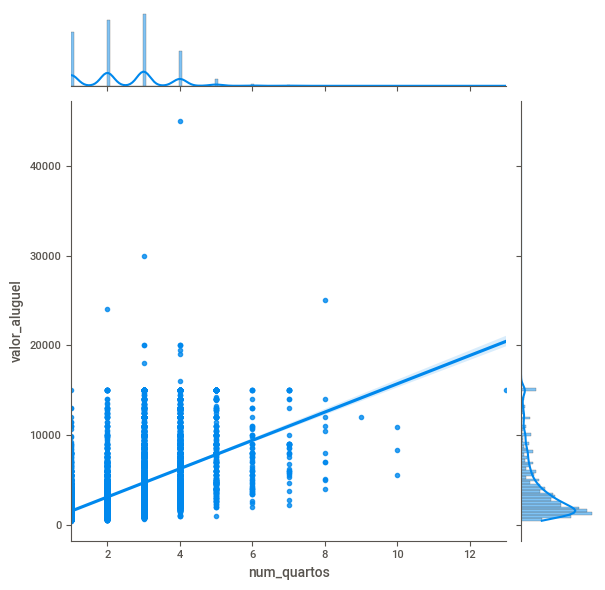

In [90]:
sns.jointplot(y= data['valor_aluguel'],x = data['num_quartos'],kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

<AxesSubplot:xlabel='aceita_animais', ylabel='count'>

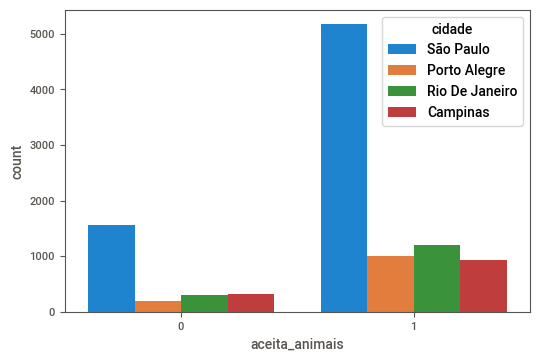

In [94]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [98]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='animal_categorical'>

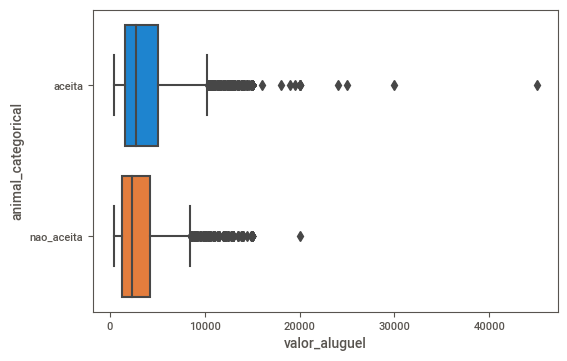

In [99]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [91]:
col = pd.DataFrame(data['cidade'].unique())
col

0
0       São Paulo
1    Porto Alegre
2  Rio De Janeiro
3        Campinas

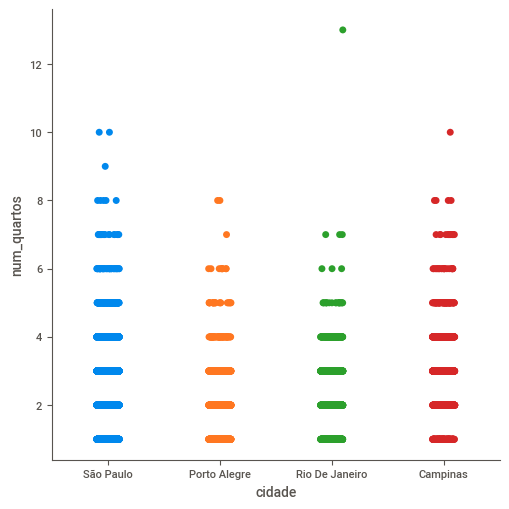

In [100]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='num_banheiros', ylabel='count'>

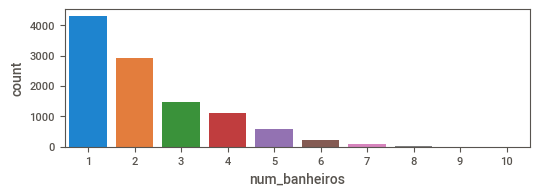

In [105]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

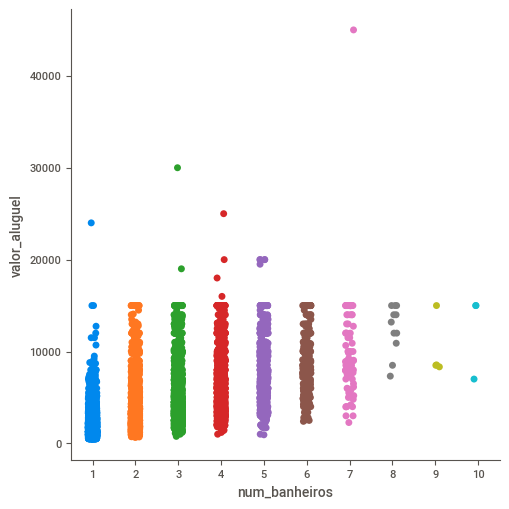

In [106]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [108]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='mobilia_categorical'>

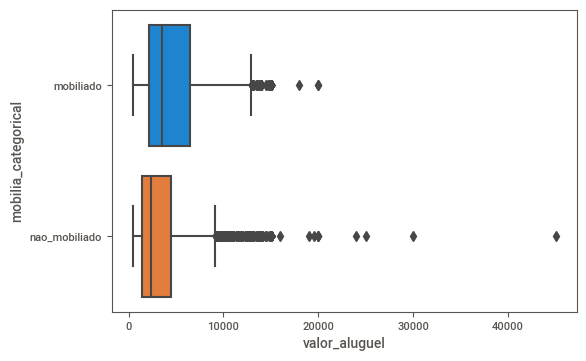

In [110]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Whats the relationship between parking spaces and the total rent?

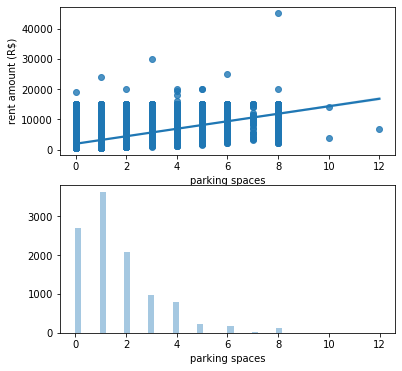

In [ ]:
plt.figure(figsize =(6,6))
plt.subplot(2,1,1)
ax = sns.regplot(data['parking spaces'],data['rent amount (R$)'])
plt.subplot(2,1,2)
sns.distplot(data['parking spaces'],kde =False)

There is very less correlation between the parking spaces and the rent amount and mostly people are choosing houses with 0 to 2 parking spaces

# What about Fire Insurance?

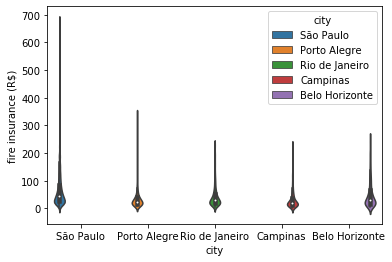

In [ ]:
sns.violinplot(x ='city', y ='fire insurance (R$)', data = data,hue ='city')

SaoPaulo is the city which has more fire insurance amount followed by Porto Alegre, Belo Horizonte, Rio De Janerio and atlast Campinas

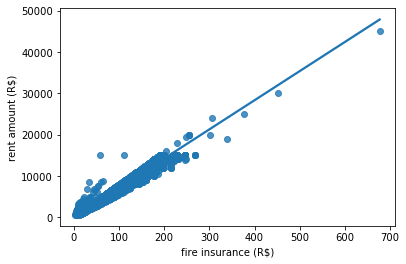

In [ ]:
ax = sns.regplot(data['fire insurance (R$)'],data['rent amount (R$)'])

There is very high correlation with Fire Insurance amount and the rent amount, if the fire insurance is more then the rent will also be more and vice versa

# What about the impact of property tax in the rent?

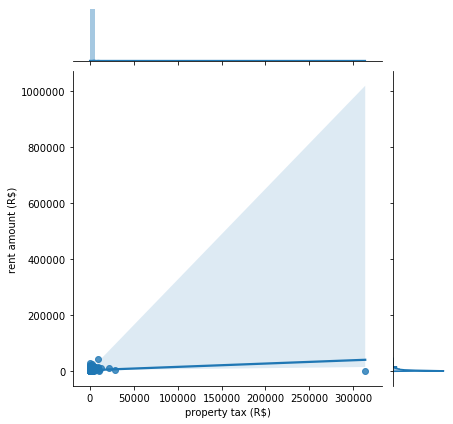

In [ ]:
sns.jointplot(y= data['rent amount (R$)'],x = data['property tax (R$)'],kind ='reg')

<b>!!!!!!!!!!!!!!!!!!!!LITERALLY NO IMPACT AT ALL!!!!!!!!!!!!!!!!!!!!!!!!!!</b>

In [ ]:
Wantedcolumns = ['fire insurance (R$)','parking spaces','rent amount (R$)','rooms','total (R$)','city','furniture','animal']

In [ ]:
data_x = data[Wantedcolumns]

In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fire insurance (R$)  10692 non-null  int64 
 1   parking spaces       10692 non-null  int64 
 2   rent amount (R$)     10692 non-null  int64 
 3   rooms                10692 non-null  int64 
 4   total (R$)           10692 non-null  int64 
 5   city                 10692 non-null  object
 6   furniture            10692 non-null  object
 7   animal               10692 non-null  object
dtypes: int64(5), object(3)
memory usage: 668.4+ KB


In [ ]:
for i in data_x.columns:
    if data_x[i].dtype == object:
        print(i)
        data_x =cat_to_num(data_x,i)

city
furniture
animal


In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fire insurance (R$)  10692 non-null  int64 
 1   parking spaces       10692 non-null  int64 
 2   rent amount (R$)     10692 non-null  int64 
 3   rooms                10692 non-null  int64 
 4   total (R$)           10692 non-null  int64 
 5   city                 10692 non-null  object
 6   furniture            10692 non-null  object
 7   animal               10692 non-null  object
 8   Belo Horizonte       10692 non-null  uint8 
 9   Campinas             10692 non-null  uint8 
 10  Porto Alegre         10692 non-null  uint8 
 11  Rio de Janeiro       10692 non-null  uint8 
 12  furnished            10692 non-null  uint8 
 13  acept                10692 non-null  uint8 
dtypes: int64(5), object(3), uint8(6)
memory usage: 731.0+ KB


In [ ]:
data_x.drop(['city','furniture','animal'],axis =1,inplace =True)

In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   fire insurance (R$)  10692 non-null  int64
 1   parking spaces       10692 non-null  int64
 2   rent amount (R$)     10692 non-null  int64
 3   rooms                10692 non-null  int64
 4   total (R$)           10692 non-null  int64
 5   Belo Horizonte       10692 non-null  uint8
 6   Campinas             10692 non-null  uint8
 7   Porto Alegre         10692 non-null  uint8
 8   Rio de Janeiro       10692 non-null  uint8
 9   furnished            10692 non-null  uint8
 10  acept                10692 non-null  uint8
dtypes: int64(5), uint8(6)
memory usage: 480.4 KB


# Statistical Description of the data on which we are going to do perdictive analysis

In [ ]:
data_x.describe()

fire insurance (R$)  parking spaces  rent amount (R$)         rooms  \
count         10692.000000    10692.000000      10692.000000  10692.000000   
mean             53.300879        1.609147       3896.247194      2.506079   
std              47.768031        1.589521       3408.545518      1.171266   
min               3.000000        0.000000        450.000000      1.000000   
25%              21.000000        0.000000       1530.000000      2.000000   
50%              36.000000        1.000000       2661.000000      2.000000   
75%              68.000000        2.000000       5000.000000      3.000000   
max             677.000000       12.000000      45000.000000     13.000000   

         total (R$)  Belo Horizonte      Campinas  Porto Alegre  \
count  1.069200e+04    10692.000000  10692.000000  10692.000000   
mean   5.490487e+03        0.117658      0.079779      0.111579   
std    1.648473e+04        0.322218      0.270964      0.314862   
min    4.990000e+02        0.000000      0.000000      0.000000   
25%    2.061750e+03        0.000000      0.000000      0.000000   
50%    3.581500e+03        0.000000      0.000000      0.000000   
75%    6.768000e+03        0.000000      0.000000      0.000000   
max    1.120000e+06        1.000000      1.000000      1.000000   

       Rio de Janeiro     furnished         acept  
count    10692.000000  10692.000000  10692.000000  
mean         0.140385      0.243734      0.777778  
std          0.347403      0.429354      0.415759  
min          0.000000      0.000000      0.000000  
25%          0.000000      0.000000      1.000000  
50%          0.000000      0.000000      1.000000  
75%          0.000000      0.000000      1.000000  
max          1.000000      1.000000      1.000000

In [ ]:
y = data_x['rent amount (R$)']
x = data_x.drop(['rent amount (R$)'],axis =1)

In [ ]:
y.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   fire insurance (R$)  10692 non-null  int64
 1   parking spaces       10692 non-null  int64
 2   rooms                10692 non-null  int64
 3   total (R$)           10692 non-null  int64
 4   Belo Horizonte       10692 non-null  uint8
 5   Campinas             10692 non-null  uint8
 6   Porto Alegre         10692 non-null  uint8
 7   Rio de Janeiro       10692 non-null  uint8
 8   furnished            10692 non-null  uint8
 9   acept                10692 non-null  uint8
dtypes: int64(4), uint8(6)
memory usage: 396.9 KB


In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size =0.3)

In [ ]:
acc=[]

# Predictive analysis of Rent using
* Decision Tree Regression
* Random Forest Regression
* Linear Regression
* SVM Regression
* K Nearest Neighbour Regression
* Lasso Regression
* Ridge Regression

![image.png](attachment:image.png)

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor as regr
model =regr()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score
print(r2_score(y_test,model.predict(X_test)))
acc.append(['DTR',r2_score(y_test,model.predict(X_test))])

0.986884188446891


# Visualising the Decision Tree

     |████████████████████████████████| 278 kB 3.3 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=0fe7fce18b350a60ffb3a7a3faf7130e5995b54adbe898932257236257a4548a
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.165925 to fit



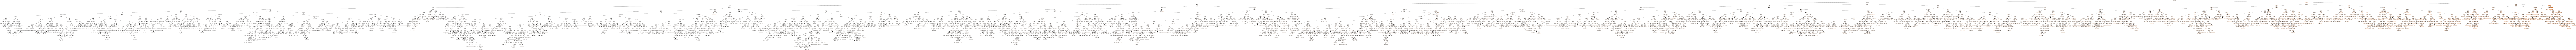

<Figure size 7200x5040 with 0 Axes>

In [ ]:
!pip install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
plt.figure(figsize=(100,70))
Image(graph.create_png())

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

0.9911501452934557


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LIR',r2_score(y_test,model.predict(X_test))])

0.9768937120743212


# SVM Regression

In [ ]:
from sklearn.svm import SVR as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['SVM',r2_score(y_test,model.predict(X_test))])

0.1796536755083915


# K Nearest Neighbour Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

0.9548361083793836


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LaR',r2_score(y_test,model.predict(X_test))])

0.9768833064740182


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RiR',r2_score(y_test,model.predict(X_test))])

0.9768941169954144


# Different Algorithms and their performance

In [ ]:
acc.sort(key = lambda y:y[1],reverse =True)

In [ ]:
acc

[['RFN', 0.9911501452934557],
 ['DTR', 0.986884188446891],
 ['RiR', 0.9768941169954144],
 ['LIR', 0.9768937120743212],
 ['LaR', 0.9768833064740182],
 ['KNNR', 0.9548361083793836],
 ['SVM', 0.1796536755083915]]

# As the Random Forest Regressor tops the list we will use it as our final model!!!!

In [ ]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

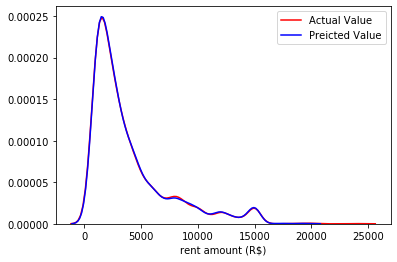

In [ ]:
ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value")
sns.distplot(model.predict(X_test),color ="b",hist = False,kde =True, label = "Preicted Value",ax =ax1)

**The overlapping of two curves tells about the higher accuracy of our model (99%)**

![image.png](attachment:image.png)

# I really convey my sincere gratitude to all who viewed my kernal and please upvote it, then only aspiring data scientist like me can achieve more...<br/>
# <center>If you have any query post it in comment section...<center>

![image.png](attachment:image.png)